In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [23]:
df = pd.read_csv('marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test_group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [24]:
df.shape

(588101, 7)

In [25]:
type(df['converted'])

pandas.core.series.Series

In [26]:
df.nunique()

Unnamed: 0       588101
user id          588101
test_group            2
converted             2
total ads           807
most ads day          7
most ads hour        24
dtype: int64

In [27]:
df.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279667,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


In [28]:
df[df["converted"] == False]["converted"] =0

C:\Users\Bastani\AppData\Local\Temp\ipykernel_13736\3292658346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["converted"] == False]["converted"] =0


In [29]:
df[df["converted"] == True]["converted"] =1

C:\Users\Bastani\AppData\Local\Temp\ipykernel_13736\3823994265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["converted"] == True]["converted"] =1


In [30]:
df["converted"].replace(False,0, inplace=True)

In [31]:
df

,Unnamed: 0,user id,test_group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,0,130,Monday,20
1,1,1119715,ad,0,93,Tuesday,22
2,2,1144181,ad,0,21,Tuesday,18
3,3,1435133,ad,0,355,Tuesday,10
4,4,1015700,ad,0,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,0,1,Tuesday,23
588097,588097,1327975,ad,0,1,Tuesday,23
588098,588098,1038442,ad,0,3,Tuesday,23
588099,588099,1496395,ad,0,1,Tuesday,23


In [32]:
df.converted.mean()*100

2.523886203220195

In [34]:
df_ad = df.query('test_group == "ad"')
df_psa = df.query('test_group == "psa"')

In [35]:
df_ad["converted"].mean()*100

2.5546559636683748

In [36]:
df_psa["converted"].mean()*100

1.785410644448223

In [37]:
df['converted'].mean()

0.02523886203220195

In [38]:
1 - df['converted'].mean()

0.9747611379677981

In [39]:
len(df_ad)

564577

In [40]:
ad_converted = np.random.binomial(len(df_ad), df.converted.mean(), 10000) / len(df_ad)

In [41]:
psa_converted = np.random.binomial(len(df_psa), df.converted.mean(), 10000) / len(df_psa)

In [42]:
ad_converted

array([0.0249957 , 0.02534287, 0.02523836, ..., 0.0253039 , 0.02485932,
       0.02493548])

In [43]:
psa_converted

array([0.023933  , 0.02350791, 0.02703622, ..., 0.02282775, 0.02584594,
       0.02856657])

In [47]:
p_diffs = ad_converted - psa_converted
p_diffs

array([ 0.0010627 ,  0.00183496, -0.00179785, ...,  0.00247615,
       -0.00098663, -0.00363109])

In [45]:
p_diffs.mean()

4.7493365386295765e-06

In [49]:
ab_data_diff = df_ad['converted'].mean() - df_psa['converted'].mean()
ab_data_diff

0.007692453192201517

In [50]:
(p_diffs > ab_data_diff).mean() * 100

0.0

##### Because the p-value is less than 0.05, it can be concluded that the advertisements had an impact on the purchase of users.

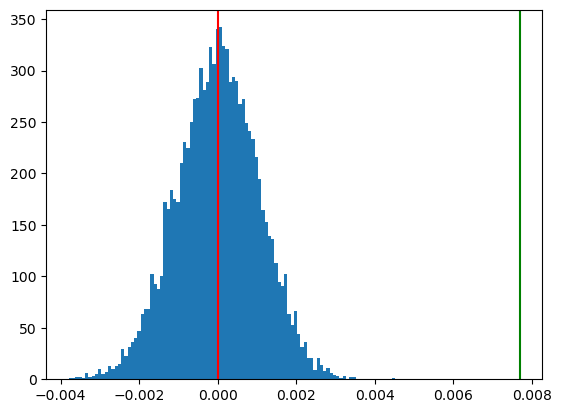

In [51]:
plt.hist(p_diffs, bins=100)
low = ab_data_diff
higth = p_diffs.mean()
plt.axvline(x=low, color='g')
plt.axvline(x=higth, color='r')